# Regression Analysis on Cars Dataset

The goal is to explain and predict the consumption of cars (y= `mpg`) from p = 3 input (explanatory, predictor) variables ($X_1$: `cyl`, $X_2$: `hp`, $X_3$: `wt`). Hence the regression equation is wrtten as:

$y_i$ = $\alpha_1 x_i1 + \alpha_2 x_2 + \alpha_3 x_i3 + \epsilon_i, i = 1,....n$

The intention of this notebook is to perform regression analysis to esitmate the values of the coefficients ($\alpha_1, \alpha_2, \alpha_3$) using the cars dataset

Source: [Ricco Rakotomalala - Tanagra Data Mining](http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Python_StatsModels.pdf)

In [21]:
import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

In [2]:
cars = pd.read_csv("./cars.csv")
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [11]:
#dimensions
print(cars.shape)

# number of instances
n = len(cars)

# number of input variables for the regression
p = len(cars.columns) - 1

(32, 12)


In [12]:
# list all variables
cars.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

## Plot Distributions for initial analysis

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


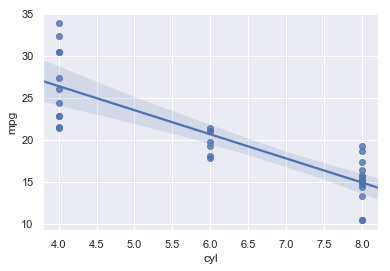

In [29]:
# Plot Distributions
sns.regplot(x = 'cyl', y = 'mpg', data = cars);

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


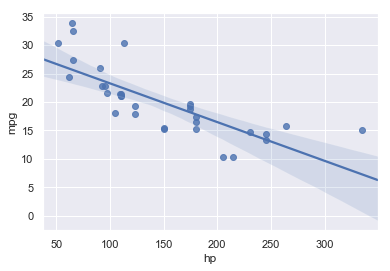

In [30]:
sns.regplot(x = 'hp', y = 'mpg', data = cars);

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


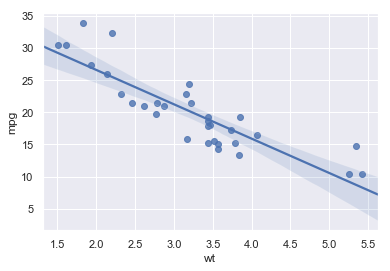

In [31]:

sns.regplot(x = 'wt', y = 'mpg', data = cars);

## Regression Analysis

In [19]:
import statsmodels.formula.api as smf # regression with formula

reg = smf.ols('mpg ~ cyl + hp + wt', data = cars)

res = reg.fit() # use fit() to initiate the modelling process

just FYI, we can se the `dir()` to see the properties and methods from the reg instance from when we used the ols. 

In [16]:
print(dir(reg))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_data_attr', '_df_model', '_df_resid', '_fit_ridge', '_get_init_kwds', '_handle_data', '_init_keys', '_setup_score_hess', 'data', 'df_model', 'df_resid', 'endog', 'endog_names', 'exog', 'exog_names', 'fit', 'fit_regularized', 'formula', 'from_formula', 'get_distribution', 'hessian', 'hessian_factor', 'information', 'initialize', 'k_constant', 'loglike', 'nobs', 'predict', 'rank', 'score', 'weights', 'wendog', 'wexog', 'whiten']


A couple of notable methods include:
- `f_test`
- `fvalue`
- `mse_model`
- `mse_resid`
- `parms`
- `rsquared`
- `summary`

Lets check out the results using the `summary()` display.

In [20]:
print(res.summary())  # detailed results from the ols model

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     50.17
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           2.18e-11
Time:                        05:08:13   Log-Likelihood:                -72.738
No. Observations:                  32   AIC:                             153.5
Df Residuals:                      28   BIC:                             159.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.7518      1.787     21.687      0.0

#### Interpretation
We can see the following:
- The __coefficient of determination__ is equal to `R2 = 0.843`.
- The regression is globally __significant__ at the 5% level (`F-statistic = 50.17` with `Prob (F-statistic) = 2.18e-11`].
- `wt` seems significant at the 5% level (`P>|t| = 0.000`)

We also get a Warning notification indicating a `collinearity` problem between the explanatory variables is suspected. TBD.

## Regression Diagnostics

#### Model Assumptions - Test for Error Normality
A key assumption for using Ordinary Least Squares for regression analysis and inference is the assumption of Normality, which we must check to see if the distribuution follows a normal distribution. 

First we will check the _compatibility of the residuals_, in other words, the errors observed on the sample to see if the assumption of normality is met. 

##### Jarque-Bera Normality Test
To do this we will use `jarque_bera()` function in the `statsmodels` library to test if the observed skewness and kurtosis is realitively normal. 

In [36]:
# Jarque-Bera Normality Test
import statsmodels.api as sm

stat, p, skw, kurt = sm.stats.stattools.jarque_bera(res.resid)
print(' Statistics= %.3f \n p= %.3f \n skewnewss= %.3f \n kurtosis=%.3f' %
      (stat, p, skw, kurt))

 Statistics= 4.220 
 p= 0.121 
 skewnewss= 0.870 
 kurtosis=3.369


#### Interpretation

The results from the Jarque-Bera Normality Test shows the values are consistent with those provided by the `summary()` and with the p value > 0.05 we can assume that __errors are normally distributed__. 


#### QQ Plot: Normaly Probability Plot

Next we will use the `statmodels` library to perform a QQ probability plot to identify _departures from normality_. __In short, _the normal probability plot_ is based on the comparision between the observed distributino and the theoretical distribution under the nornmal assumption. The null hypothesis (normal distribution) is rejected if the points are not aligned on a stright line__

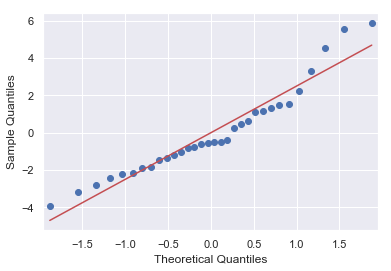

In [46]:
## qq plot vs normal distribution
sm.qqplot(res.resid, line='r');

#### Interpretation

The QQ plot above shows the observations are approximately aligned to the linear line, but there seems to be some variation with the high values of the residuals. This suggests the existance of _atypical_ points in our data. 

### Detection of outliers and influential points

we will use a specific object provided by the regression result to analyze the __influential points__, which basically are outliers that actually incluence the slope of the regression.

In [49]:
# object for the analysis of influential points
infl = res.get_influence() 
infl.hat_matrix_diag


array([0.07495754, 0.0581575 , 0.08563345, 0.05334688, 0.10981841,
       0.0698608 , 0.11762078, 0.1574183 , 0.15201954, 0.04691578,
       0.04691578, 0.07862927, 0.08370579, 0.08169851, 0.20155034,
       0.2437327 , 0.23547715, 0.08274176, 0.13078212, 0.09961207,
       0.09155927, 0.14918089, 0.15654328, 0.10338967, 0.08575683,
       0.09233897, 0.08597706, 0.16171087, 0.20532691, 0.07037046,
       0.46356582, 0.12368549])

In [50]:
# interally studentized residuals
infl.resid_studentized_internal

array([-0.75361679, -0.41554053, -1.31595242,  0.18984938,  0.6465994 ,
       -0.88775963, -0.50585438,  0.2757372 , -0.21434591, -0.32179304,
       -0.89277295,  0.54653783,  0.47452191, -0.3327434 , -0.22031406,
        0.10851041,  2.07528919,  2.31667689,  0.62664238,  2.4750788 ,
       -1.64133069, -0.80521151, -1.05548475, -0.56276021,  1.38034736,
       -0.15325766, -0.23594082,  0.9761207 , -0.27579953, -0.60824375,
        0.61430028, -1.19730285])

To determine if a point is __influential__, we visualize the regression line with and without the point and ask _does the slop of the line change considerably_ is is visualized by the size of the influential observations as seen below:

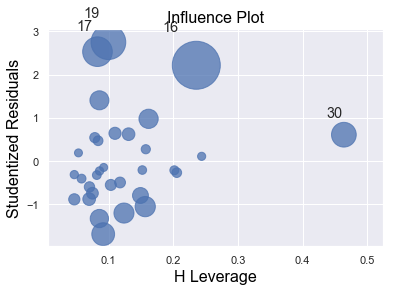

In [52]:
sm.graphics.influence_plot(res);

It appears that the problem concens that are influencing our data are car models:
- 'Chrysler Imperial'(16), 
- 'Maserati Bora'(30), 
- 'Toyota Corolla'(19) and 
- 'Fiat 128'(17)


#### Leverage - automatic detection

In addition to visually identifying leverage we can alos detect outliers and/or influential points. To do this we need to define the threshold values from which a point becomes suspect. 

![](http://faculty.cas.usf.edu/mbrannick/regression/gifs/d2.gif)

In [63]:
# number of instances
n = len(cars)

# number of input variables for the regression
p = len(cars.columns) - 1

#threshold leverage
seuil_levier = 2*(p+1)/n
print(seuil_levier)

leviers = infl.hat_matrix_diag #leverage

#identification
atyp_levier = leviers > seuil_levier

#which vehicles?
print(cars.index[atyp_levier],leviers[atyp_levier])

0.75
Int64Index([], dtype='int64') []


In [65]:
leviers

array([0.07495754, 0.0581575 , 0.08563345, 0.05334688, 0.10981841,
       0.0698608 , 0.11762078, 0.1574183 , 0.15201954, 0.04691578,
       0.04691578, 0.07862927, 0.08370579, 0.08169851, 0.20155034,
       0.2437327 , 0.23547715, 0.08274176, 0.13078212, 0.09961207,
       0.09155927, 0.14918089, 0.15654328, 0.10338967, 0.08575683,
       0.09233897, 0.08597706, 0.16171087, 0.20532691, 0.07037046,
       0.46356582, 0.12368549])

In [ ]:
TODO > Not finished


http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Python_StatsModels.pdf